In [51]:
import itertools as it
import pandas as pd 
import numpy as np

In [52]:
class RMvisualiser():


    #VALUES CAN CONTAIN NAN VALUE AND SHOULD BE FILTERED

    #load the data
    def load_data(self,path):
        self.data = pd.read_excel(path,usecols="G:AG",engine="openpyxl")


    #return all cells
    def get_full(self):
        return self.data.to_numpy()


    #return all IL values
    def get_all(self):
        return self.data.to_numpy()[3:,1:]
    

    #get all IL values for a specific wavelengths
    def get_all_wavelength(self, wavelength):
        
        temp = self.data.to_numpy()[3:,0] == wavelength

        return self.data.to_numpy()[3:,0:][temp][:,1:]


    # get all IL values for a specific connector index 
    def get_connector(self,index):

        return self.get_all()[:,index]


    # get all IL values for a specific fiber(jumper) index 
    def get_fiber(self,index):

        return self.get_all()[:,[2*index,2*index+1]]
    
    # filter the data based on a list of fibers(jumpers to include)
    # example :

    # select fibers 1,2,3,4 
    # RM.select_n_fibers([0,1,2,3])

    def select_n_fibers(self,data,indecies):


        wave_adjusted_indecies = []
        adjusted_indecies = []
        for i in indecies:
            #wave_adjusted_indecies.append(6*i)
            #wave_adjusted_indecies.append(6*i+1)
            #wave_adjusted_indecies.append(6*i+2)
            #wave_adjusted_indecies.append(6*i+3)
            #wave_adjusted_indecies.append(6*i+4)
            #wave_adjusted_indecies.append(6*i+5)

            adjusted_indecies.append(2*i)
            adjusted_indecies.append(2*i+1)


        temp = data[adjusted_indecies,:][:,adjusted_indecies]

        return temp
    

    #return a list with elements containing data for all
    #possible combinations of 10 fibers chosen from 13 

    def get_all_10connectors_wavelength(self,wavelength):

        all_combinations_tupples = it.combinations(range(0,13),10)

        full_data = []


        data_a = self.get_all_wavelength(wavelength)
        for combination in all_combinations_tupples:

            data = self.select_n_fibers(data_a,list(combination)).flatten()

            data = data.astype(float)
            data = data[~np.isnan(data)]

            full_data.append(data)
        
        return full_data
    

    #returns a mean(avg) value of IL for
    # possible combinations of connectors
    def get_mean_all_10connectors(self):


        return list(map(lambda x : x.mean(),self.get_all_10connectors()))
    
    
    #returns a 97th percentile value of IL for
    # possible combinations of connectors
    def get_97percentiles(self):

        full_data = self.get_all_10connectors()

        return [np.percentile(x,97) for x in full_data]


    #returns the average value of IL for all connectors

    def average_connectors(self):

        ILs = []
        for i in range(26):
            IL = self.get_connector(i).flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            ILs.append(IL.mean())

        return ILs
    
    #returns the average value of IL for all filbers(jumpers)

    def average_fibers(self):
        ILs = []
        for i in range(13):
            IL = self.get_fiber(i).flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            ILs.append(IL.mean())

        return ILs
            

    #returns the standard deviation for all connectors

    def std_connectors(self):

        ILs = []
        for i in range(26):
            IL = self.get_connector(i).flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            ILs.append(np.std(IL))

        return ILs
        
    # returns the ranking of connectors based on the average IL

    def connector_ranking(self):

        means = self.average_connectors()

        return np.argsort(means)
    

    # returns the mean values of ILs per connector 

    # ILs = RM.connector_wavelength_mean(1550)
    def connetor_wavelength_mean(self,wavelength):

        data = self.get_all_wavelength(wavelength)

        averages = []
        for i in range(26):
            IL = data[:,i].flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            averages.append(IL.mean())


        return averages
    
    
    # returns the std of ILs per connector 

    # ILs = RM.connector_wavelength_mean(1550)
    def connetor_wavelength_ranking_std(self,wavelength):

        data = self.get_all_wavelength(wavelength)

        stds = []
        for i in range(26):
            IL = data[:,i].flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            stds.append(np.std(IL))


        return stds
    

     # returns the mean values of ILs per jumper 

    # ILs = RM.jumper_wavelength_mean(1550)
    def jumper_wavelength_mean(self,wavelength):

        data = self.get_all_wavelength(wavelength)

        averages = []
        for i in range(13):
            IL = data[:,[2*i,2*i+1]].flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            averages.append(IL.mean())


        return averages
    
    
    # returns the std of ILs per jumper

    # ILs = RM.jumper_wavelength_ranking_mean(1550)
    def jumper_wavelength_ranking_std(self,wavelength):

        data = self.get_all_wavelength(wavelength)

        stds = []
        for i in range(13):
            IL = data[:,[2*i,2*i+1]].flatten()
            IL = IL.astype(float)
            IL = IL[~np.isnan(IL)]

            stds.append(np.std(IL))


        return stds

In [53]:
RM = RMvisualiser()

RM.load_data("RM example data.xlsx")


RM.get_all()

array([[nan, nan, 0.01, ..., 0.01, 0.06, 0.01],
       [nan, nan, 0.03, ..., 0.02, 0.04, 0.01],
       [nan, nan, 0.04, ..., 0.01, 0.04, 0.01],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

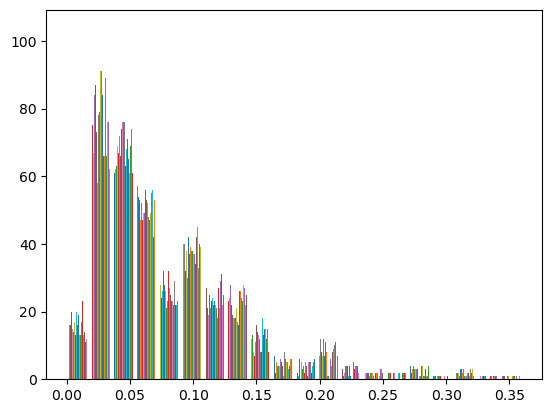

In [54]:
import matplotlib.pyplot as plt

plt.hist(RM.get_all_10connectors_wavelength(1550),20)
plt.show()

In [55]:
A = RM.get_all_wavelength(1550)

RM.select_n_fibers(A,[1,2])

array([[nan, nan, 0.2, 0.21],
       [nan, nan, 0.06, 0.06],
       [0.2, 0.04, nan, nan],
       [0.31, 0.07, nan, nan]], dtype=object)